In [328]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from glob import glob as glob
import os
import pywt

In [298]:
num_class = 15
num_train = 20
num_test = 5
im_size = np.array((192, 168))

In [299]:
def filter_files(d, num_train, num_test, cond):
    fnames = [os.path.basename(i)[:-4] for i in glob(d+"/*_P00A*.pgm")]
    acc_files = []
    for f in fnames:
        az = int(f[12:16])
        elev = int(f[17:20])
        if cond(az, elev):
            acc_files.append(f)
    samps = np.random.choice(acc_files, num_train+num_test, replace=False)
    return samps[:num_train], samps[num_train:]

def fread(f):
    return plt.imread(f).flatten().T

def_cond = lambda az, elev: abs(az) <= 45 and abs(elev) <= 45
def train_test_split(num_classes=5, num_train=5, num_test=3, cond = def_cond):
    
    class_dirnames = np.random.choice(glob("CroppedYale/*"), size=num_classes, replace=False)
    
    train_fnames_all, test_fnames_all = np.array([]), np.array([])
    
    A = np.zeros((np.prod(im_size), num_classes*num_train))
    y = np.zeros((np.prod(im_size), num_classes*num_test))
    
    train_gt = np.zeros(num_classes*num_train).astype(int)
    test_gt = np.zeros(num_classes*num_test).astype(int)
    
    for i, d in enumerate(class_dirnames):
        train_fnames, test_fnames = filter_files(d, num_train, num_test, cond)
        train_fnames_all = np.append(train_fnames_all, train_fnames)
        test_fnames_all = np.append(test_fnames_all, test_fnames)
        for j, f in enumerate(train_fnames):
            idx = (i*num_train+j)
            A[:,idx] = fread(d+"/"+f+".pgm")
            train_gt[idx] = i
        for j, f in enumerate(test_fnames):
            idx = (i*num_test+j) 
            y[:,idx] = fread(d+"/"+f+".pgm")
            test_gt[idx] = i
            
    return A, y, train_gt, test_gt, (train_fnames_all, test_fnames_all)

In [300]:
A, y, train_gt, test_gt, names = train_test_split(num_classes = num_class, num_train = num_train, num_test = num_test)
print(A.shape, y.shape)
print(train_gt)
print(test_gt)

(32256, 300) (32256, 75)
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14]
[ 0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  3  3  3  3  3 

In [301]:
names

(array(['yaleB09_P00A+020E-10', 'yaleB09_P00A+010E+00',
        'yaleB09_P00A+025E+00', 'yaleB09_P00A-025E+00',
        'yaleB09_P00A+000E+45', 'yaleB09_P00A-035E+40',
        'yaleB09_P00A-010E+00', 'yaleB09_P00A+005E+10',
        'yaleB09_P00A+005E-10', 'yaleB09_P00A+020E-40',
        'yaleB09_P00A+000E-35', 'yaleB09_P00A-015E+20',
        'yaleB09_P00A+035E+15', 'yaleB09_P00A-020E-10',
        'yaleB09_P00A+035E+40', 'yaleB09_P00A+010E-20',
        'yaleB09_P00A-020E-40', 'yaleB09_P00A-035E+15',
        'yaleB09_P00A+020E+10', 'yaleB09_P00A-005E+10',
        'yaleB03_P00A+020E-40', 'yaleB03_P00A+035E+40',
        'yaleB03_P00A-005E+10', 'yaleB03_P00A+005E-10',
        'yaleB03_P00A+000E-20', 'yaleB03_P00A+000E+45',
        'yaleB03_P00A-025E+00', 'yaleB03_P00A+035E+15',
        'yaleB03_P00A+020E+10', 'yaleB03_P00A+035E-20',
        'yaleB03_P00A-020E-40', 'yaleB03_P00A+010E-20',
        'yaleB03_P00A-010E+00', 'yaleB03_P00A+010E+00',
        'yaleB03_P00A-015E+20', 'yaleB03_P00A+02

In [302]:
def down_samp(A, ds_factor=16):
    im_size_down = np.ceil(im_size/ds_factor).astype(int)
    A_down = np.zeros((np.prod(im_size_down), A.shape[-1]))
#     print(A_down.shape)
    for i in range(A.shape[-1]):
        A_down[:,i] = A[:,i].reshape(im_size)[::ds_factor, ::ds_factor].flatten()
    return A_down, im_size_down

In [303]:
def down_samp_pca(A, dim=25):
    # sklearn PCA
    pca = PCA(n_components=dim, svd_solver="auto")
    A_pca = pca.fit_transform(A.T).T
    
    # Manual PCA
#     U, S, Vh = np.linalg.svd(A, full_matrices=True)
#     print(U.shape, S.shape, Vh.shape)
#     A_pca = U[:,:dim].T@A
    return A_pca, A_pca.shape

In [304]:
def down_samp_wave(A):
    im_vec = A.reshape((*im_size,-1))
    wave_vec = pywt.wavedec2(im_vec, 'haar', axes=(0,1), level=4)
#     low_dim_data = wave_vec[0]
    low_dim_data = wave_vec[0] + sum(wave_vec[1])
    return low_dim_data.reshape(-1, A.shape[-1]), low_dim_data.shape[:2]

In [305]:
A_ds, ds_shape = down_samp(A, ds_factor=16)

In [306]:
A_wave, wave_shape = down_samp_wave(A)

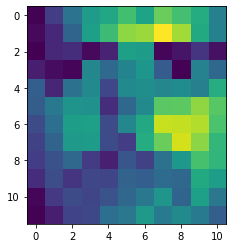

In [307]:
plt.imshow(A_ds[...,3].reshape(ds_shape))

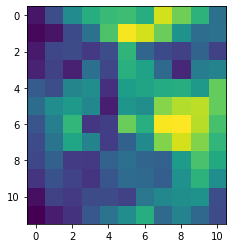

In [308]:
plt.imshow(A_wave[...,3].reshape(wave_shape))

In [309]:
A_pca, pca_shape = down_samp_pca(A)

In [310]:
pca_shape

(25, 300)

In [311]:
A_pca[...,0]

array([-5194.4509167 , -2232.84863042,   912.05017348, -1192.01759262,
        -121.52029239,  1245.42812244,    36.44833268, -1201.40703942,
        1537.49335652,   878.67322168,  -741.97068781, -1047.67245296,
        -459.91642061,   -96.97070802,  1352.92045296,   -39.07097242,
         -72.84112066,   673.69286242,   797.73446665,    74.14660622,
         370.03576287,   221.01237566,    87.0803779 ,  -543.46615149,
         184.47701294])

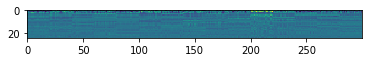

In [312]:
plt.imshow(A_pca)

In [313]:
def delta(x, i):
    assert i < num_class
    out = np.zeros(len(x))
    idxs = slice(i*num_class, i*num_class+num_train)
    out[idxs] = x[idxs]
    return out

In [314]:
delta(np.ones(A.shape[-1]), 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [335]:
def identity(A, y):
    A_norm = np.linalg.norm(A, axis=0)
    y_norm = np.linalg.norm(y)
#     print(A, y)
#     prob = Lasso(fit_intercept=False, alpha=1e-3, max_iter=1e3)
    prob = LassoCV(fit_intercept=False, max_iter=1e4)
    prob.fit(A/A_norm, y/y_norm)
    x_hat = prob.coef_
    r = np.zeros(num_class)
    for i in range(num_class):
        r[i] = np.linalg.norm(y-A@delta(x_hat, i))
#     print(x_hat)
    return np.argmin(r)

In [316]:
np.linalg.norm(A, axis=0).shape

(300,)

In [317]:
def robust_identity(A, y):
    A = A/np.linalg.norm(A, axis=0)
    y = y/np.linalg.norm(y)
    m,n = A.shape
    B = np.hstack((A, np.eye(m)))
    print(B.shape)
    prob = Lasso(fit_intercept=False)
    prob.fit(B, y)
    w_hat = prob.coef_
    x_hat = w_hat[:n]
    e_hat = w_hat[n:]
    r = np.zeros(L)
    for i in range(L):
        r[i] = np.linalg.norm(y-e_hat-A@delta(x_hat, i))
    print(r-np.min(r))
    return np.argmin(r)

In [330]:
def evaluate(A, y, train_gt, test_gt, ld_func=down_samp):
    train_pred = np.ones_like(train_gt)*-1
    test_pred = np.ones_like(test_gt)*-1
    A_ld, _ = ld_func(A)
    y_ld, _ = ld_func(y)
    
    print(A_ld.shape, y_ld.shape)
    for i in range(len(train_pred)):
        train_pred[i] = identity(A_ld, A_ld[:,i])
#         return
    for i in range(len(test_pred)):
        test_pred[i] = identity(A_ld, y_ld[:,i])
    
    print(train_pred)
    train_acc = accuracy_score(train_gt, train_pred)
    test_acc = accuracy_score(test_gt, test_pred)
    
    print("Accuracy for {}:\n\tTrain Accuracy: {:.2f}\n\tTest Accuracy: {:.2f}".format(ld_func.__name__, train_acc, test_acc))

In [331]:
down_samp_funcs = [down_samp, down_samp_wave]

In [ ]:
for func in down_samp_funcs:
    evaluate(A, y, train_gt, test_gt, ld_func=func)

In [ ]:
y_test_noise = fread(test_fnames[2])[:,None]+np.random.normal(scale=500, size=(32256,1))

In [ ]:
plt.imshow(y_test_noise.reshape(im_size))

In [ ]:
robust_identity(A_down, down_samp(y_test_noise,16)[0])